 Voting, one of the simplest and most intuitive ensemble learning techniques.

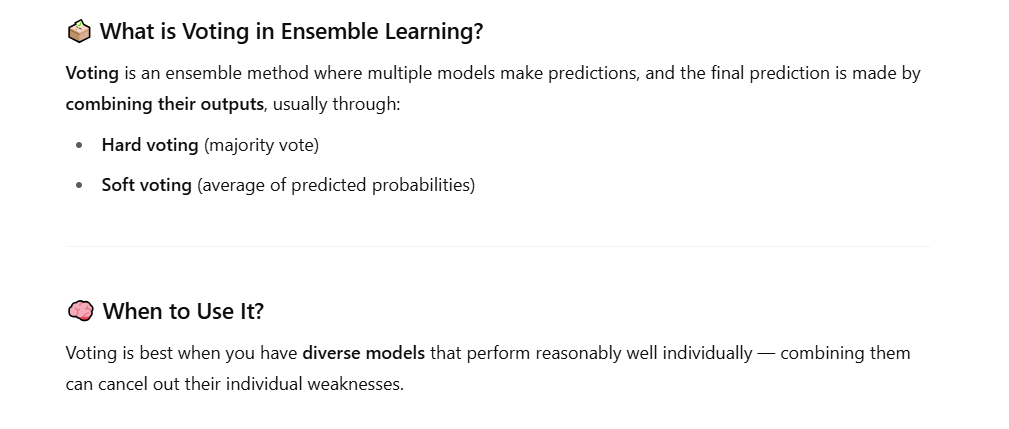

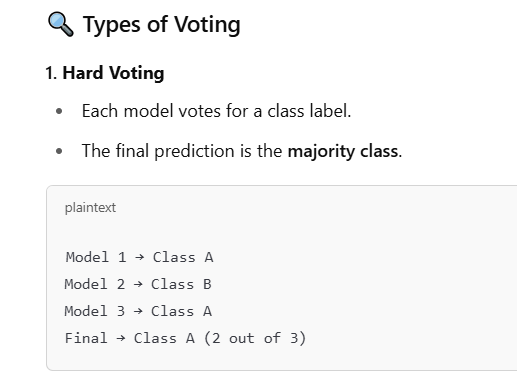

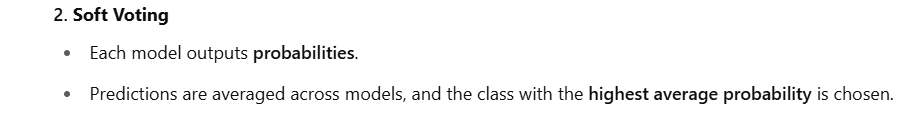

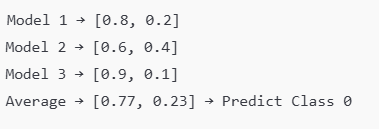

Soft voting tends to perform better if the models are well-calibrated and support probability outputs.

# **Voting Classifier in scikit-learn**

In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)  # Required for soft voting

# Hard voting
voting_hard = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard'
)

# Soft voting
voting_soft = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'
)

# Fit and evaluate
voting_hard.fit(X_train, y_train)
voting_soft.fit(X_train, y_train)

pred_hard = voting_hard.predict(X_test)
pred_soft = voting_soft.predict(X_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, pred_hard))
print("Soft Voting Accuracy:", accuracy_score(y_test, pred_soft))


Hard Voting Accuracy: 1.0
Soft Voting Accuracy: 1.0


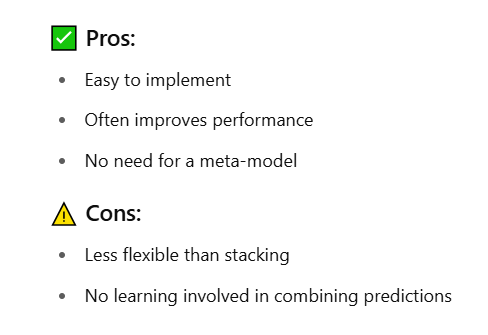